In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline


import os 
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

In [2]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
fifa19 = pd.read_csv(r"C:\Users\Lenovo\Desktop\datascience\25th, 26th- Advanced EDA project\25th, 26th- Advanced EDA project\Seaborn - SPORT\FIFA.csv")

In [4]:
fifa19

Unnamed: 0      ID                Name  Age  \
0               0  158023            L. Messi   31   
1               1   20801   Cristiano Ronaldo   33   
2               2  190871           Neymar Jr   26   
3               3  193080              De Gea   27   
4               4  192985        K. De Bruyne   27   
...           ...     ...                 ...  ...   
18202       18202  238813        J. Lundstram   19   
18203       18203  243165  N. Christoffersson   19   
18204       18204  241638           B. Worman   16   
18205       18205  246268      D. Walker-Rice   17   
18206       18206  246269           G. Nugent   16   

                                                Photo Nationality  \
0      https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1       https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2      https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3      https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4      https://cdn.sofifa.org/players/4/19/192985.png     Belgium   
...                                               ...         ...   
18202  https://cdn.sofifa.org/players/4/19/238813.png     England   
18203  https://cdn.sofifa.org/players/4/19/243165.png      Sweden   
18204  https://cdn.sofifa.org/players/4/19/241638.png     England   
18205  https://cdn.sofifa.org/players/4/19/246268.png     England   
18206  https://cdn.sofifa.org/players/4/19/246269.png     England   

                                      Flag  Overall  Potential  \
0      https://cdn.sofifa.org/flags/52.png       94         94   
1      https://cdn.sofifa.org/flags/38.png       94         94   
2      https://cdn.sofifa.org/flags/54.png       92         93   
3      https://cdn.sofifa.org/flags/45.png       91         93   
4       https://cdn.sofifa.org/flags/7.png       91         92   
...                                    ...      ...        ...   
18202  https://cdn.sofifa.org/flags/14.png       47         65   
18203  https://cdn.sofifa.org/flags/46.png       47         63   
18204  https://cdn.sofifa.org/flags/14.png       47         67   
18205  https://cdn.sofifa.org/flags/14.png       47         66   
18206  https://cdn.sofifa.org/flags/14.png       46         66   

                      Club  ... Composure Marking StandingTackle  \
0             FC Barcelona  ...      96.0    33.0           28.0   
1                 Juventus  ...      95.0    28.0           31.0   
2      Paris Saint-Germain  ...      94.0    27.0           24.0   
3        Manchester United  ...      68.0    15.0           21.0   
4          Manchester City  ...      88.0    68.0           58.0   
...                    ...  ...       ...     ...            ...   
18202      Crewe Alexandra  ...      45.0    40.0           48.0   
18203       Trelleborgs FF  ...      42.0    22.0           15.0   
18204     Cambridge United  ...      41.0    32.0           13.0   
18205      Tranmere Rovers  ...      46.0    20.0           25.0   
18206      Tranmere Rovers  ...      43.0    40.0           43.0   

       SlidingTackle GKDiving  GKHandling  GKKicking  GKPositioning  \
0               26.0      6.0        11.0       15.0           14.0   
1               23.0      7.0        11.0       15.0           14.0   
2               33.0      9.0         9.0       15.0           15.0   
3               13.0     90.0        85.0       87.0           88.0   
4               51.0     15.0        13.0        5.0           10.0   
...              ...      ...         ...        ...            ...   
18202           47.0     10.0        13.0        7.0            8.0   
18203           19.0     10.0         9.0        9.0            5.0   
18204           11.0      6.0         5.0       10.0            6.0   
18205           27.0     14.0         6.0       14.0            8.0   
18206           50.0     10.0        15.0        9.0           12.0   

      GKReflexes Release Clause  
0            8.0        €226.5M 

In [5]:
fifa19.head()

Unnamed: 0      ID               Name  Age  \
0           0  158023           L. Messi   31   
1           1   20801  Cristiano Ronaldo   33   
2           2  190871          Neymar Jr   26   
3           3  193080             De Gea   27   
4           4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

                  Club  ... Composure Marking StandingTackle  SlidingTackle  \
0         FC Barcelona  ...      96.0    33.0           28.0           26.0   
1             Juventus  ...      95.0    28.0           31.0           23.0   
2  Paris Saint-Germain  ...      94.0    27.0           24.0           33.0   
3    Manchester United  ...      68.0    15.0           21.0           13.0   
4      Manchester City  ...      88.0    68.0           58.0           51.0   

  GKDiving  GKHandling  GKKicking  GKPositioning GKReflexes Release Clause  
0      6.0        11.0       15.0           14.0        8.0        €226.5M  
1      7.0        11.0       15.0           14.0       11.0        €127.1M  
2      9.0         9.0       15.0           15.0       11.0        €228.1M  
3     90.0        85.0       87.0           88.0       94.0        €138.6M  
4     15.0        13.0        5.0           10.0       13.0        €196.4M  

[5 rows x 89 columns]

In [6]:
fifa19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [7]:
fifa19['Body Type'].value_counts()

Body Type
Normal                 10595
Lean                    6417
Stocky                  1140
Messi                      1
C. Ronaldo                 1
Neymar                     1
Courtois                   1
PLAYER_BODY_TYPE_25        1
Shaqiri                    1
Akinfenwa                  1
Name: count, dtype: int64

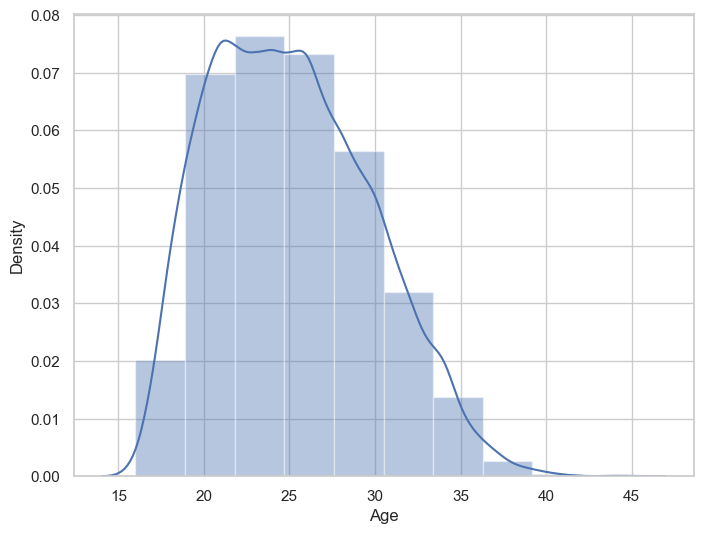

In [8]:
f,ax=plt.subplots(figsize=(8,6))
x=fifa19['Age']
ax=sns.distplot(x,bins=10)
plt.show()

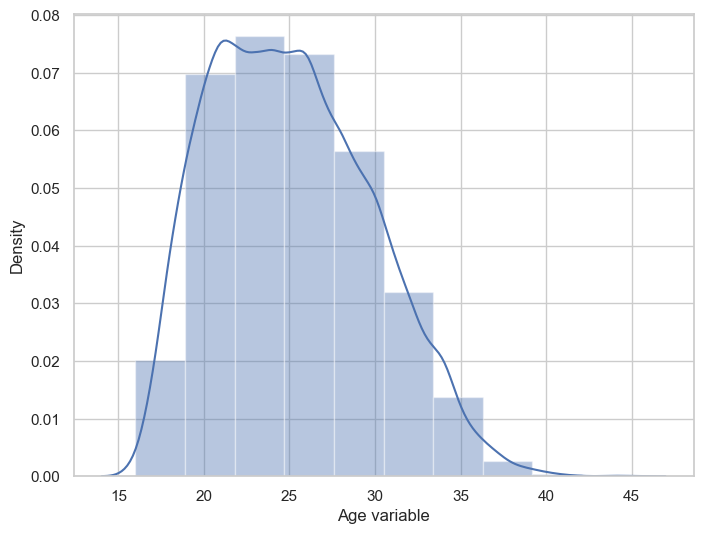

In [9]:
f,ax=plt.subplots(figsize=(8,6))
x=fifa19['Age']
x=pd.Series(x,name="Age variable")
ax=sns.distplot(x,bins=10)
plt.show()

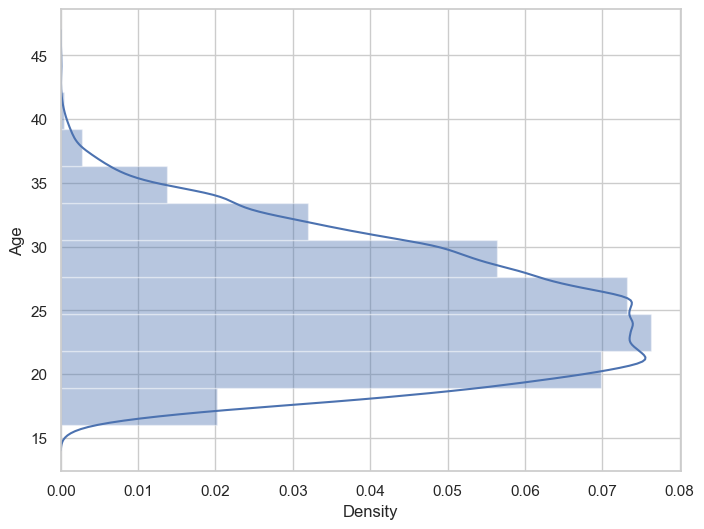

In [10]:
f,ax=plt.subplots(figsize=(8,6))
x=fifa19['Age']
ax=sns.distplot(x,bins=10,vertical=True)
plt.show()

# Seaborn Kernal Density Estimation(KDE)plot

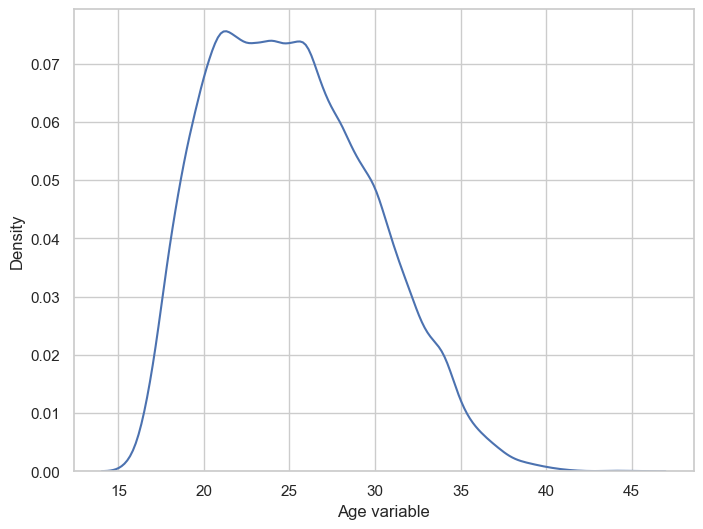

In [11]:
f,ax=plt.subplots(figsize=(8,6))
x=fifa19['Age']
x=pd.Series(x,name="Age variable")
ax=sns.kdeplot(x)
plt.show()

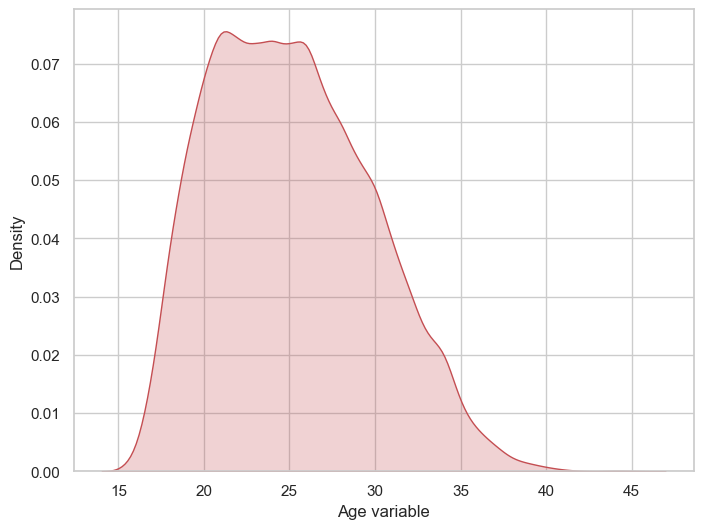

In [12]:
f,ax=plt.subplots(figsize=(8,6))
x=fifa19['Age']
x=pd.Series(x,name="Age variable")
ax=sns.kdeplot(x,shade=True,color='r')
plt.show()

# Histograms

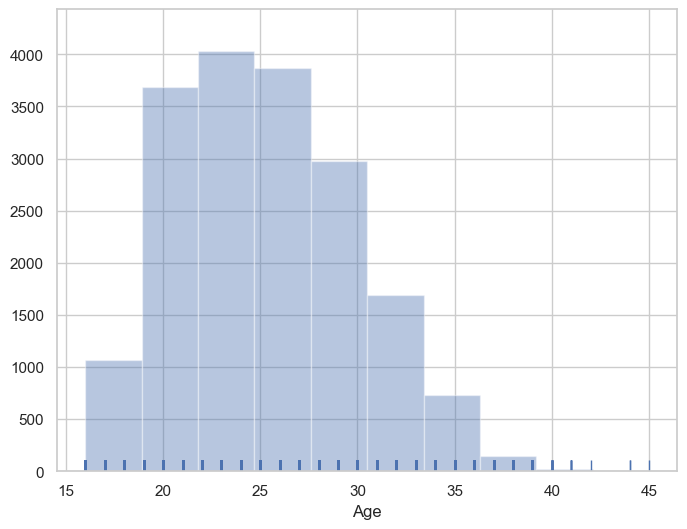

In [13]:
f,ax=plt.subplots(figsize=(8,6))
x=fifa19['Age']
ax=sns.distplot(x,kde=False,rug=True,bins=10)
plt.show()

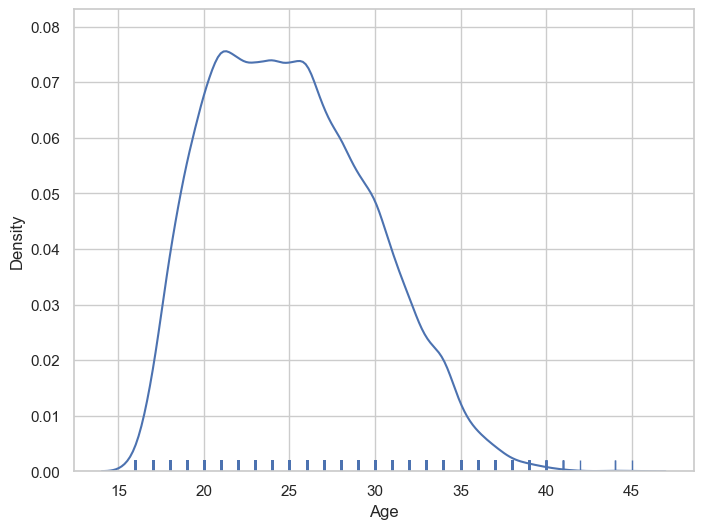

In [14]:
f,ax=plt.subplots(figsize=(8,6))
x=fifa19['Age']
ax=sns.distplot(x,hist=False,rug=True,bins=10)
plt.show()


# Explore Preferred Foot Variable

# Check Number of unique values in preferred foot variable

In [15]:
fifa19['Preferred Foot'].nunique()

2

# Check frequency distribution of values in preferred foot variable

In [16]:
fifa19['Preferred Foot'].value_counts()

Preferred Foot
Right    13948
Left      4211
Name: count, dtype: int64

# visualize frequency distribution of values with seaborn countplot()function.

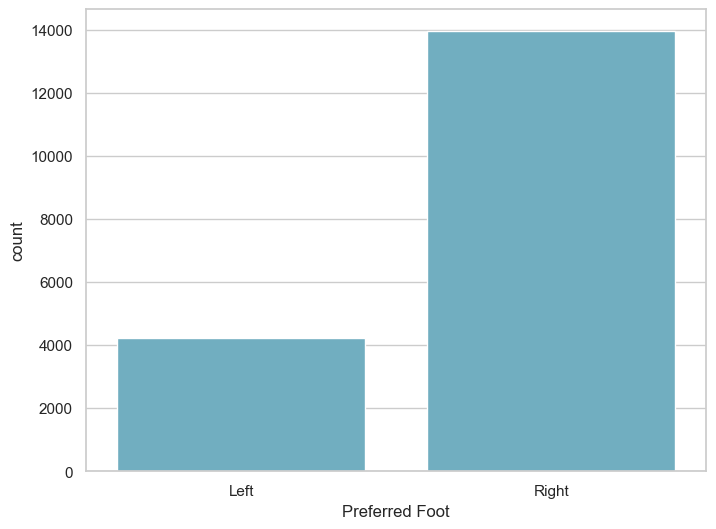

In [17]:
f,ax=plt.subplots(figsize=(8,6))
sns.countplot(x="Preferred Foot",data=fifa19,color="c")
plt.show()

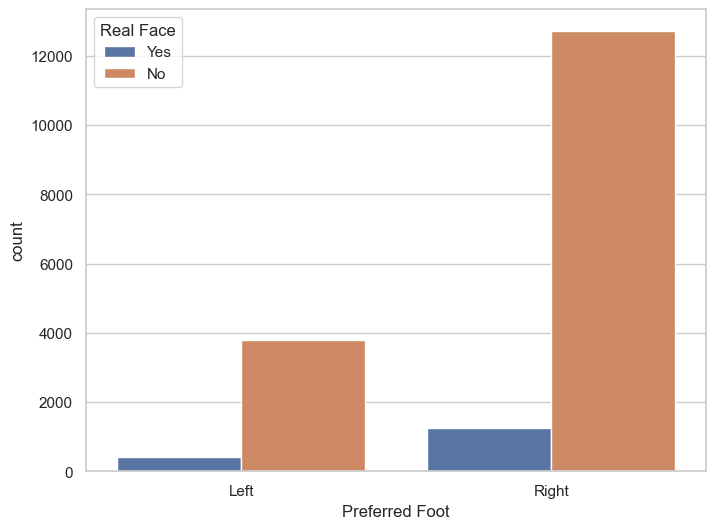

In [18]:
f,ax=plt.subplots(figsize=(8,6))
sns.countplot(x="Preferred Foot",hue="Real Face",data=fifa19)
plt.show()

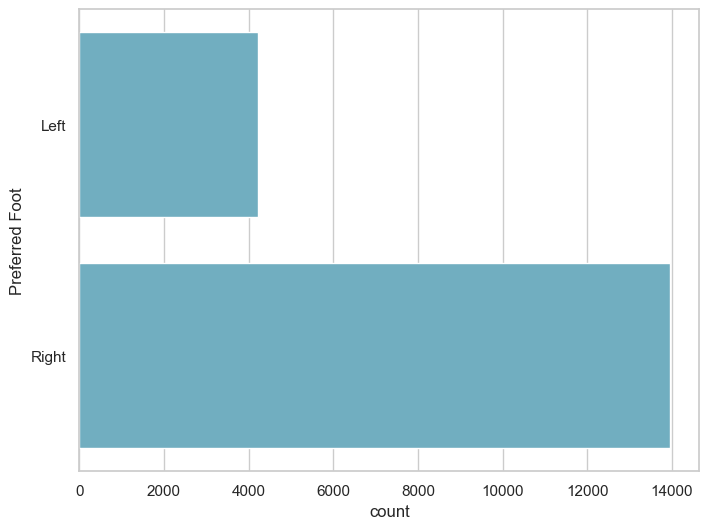

In [19]:
f,ax=plt.subplots(figsize=(8,6))
sns.countplot(y="Preferred Foot",data=fifa19,color="c")
plt.show()

# Seaborn catplot() function

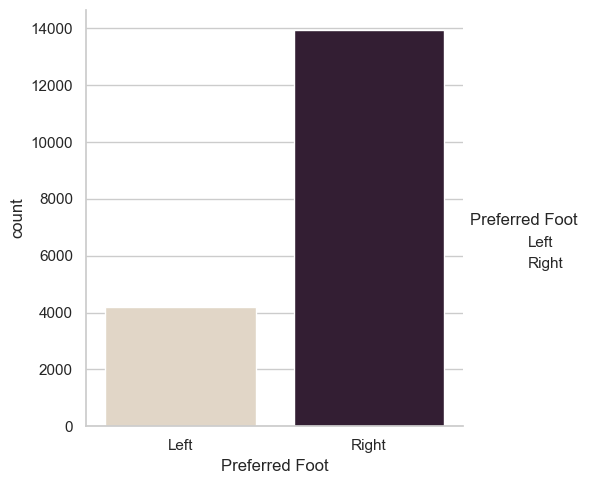

In [20]:
g=sns.catplot(x="Preferred Foot",kind="count",palette="ch:.25",data=fifa19)
plt.show()

# Explore International Reputation Variable

# Check the number of unique values in International Reputation variable.

In [21]:
fifa19['International Reputation'].nunique()

5

# Check the distribution of values in International Reputation variable

In [22]:
fifa19['International Reputation'].value_counts()

International Reputation
1.0    16532
2.0     1261
3.0      309
4.0       51
5.0        6
Name: count, dtype: int64

# Seaborn Stripplot() function

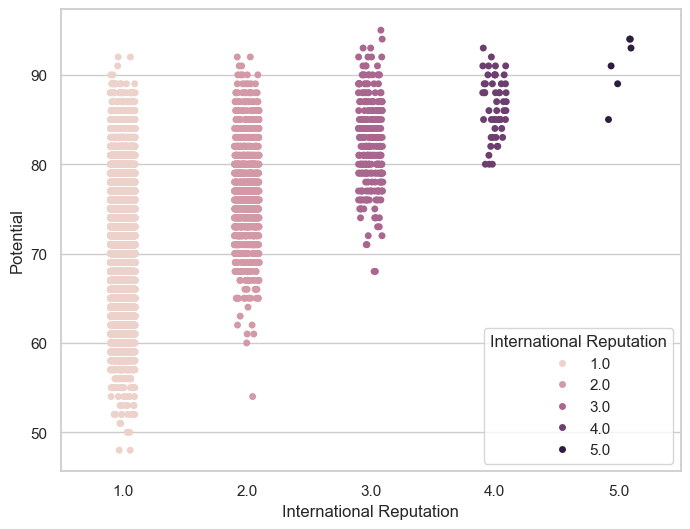

In [23]:
f,ax=plt.subplots(figsize=(8,6))
sns.stripplot(x="International Reputation",y="Potential",data=fifa19 ,hue="International Reputation")
plt.show()

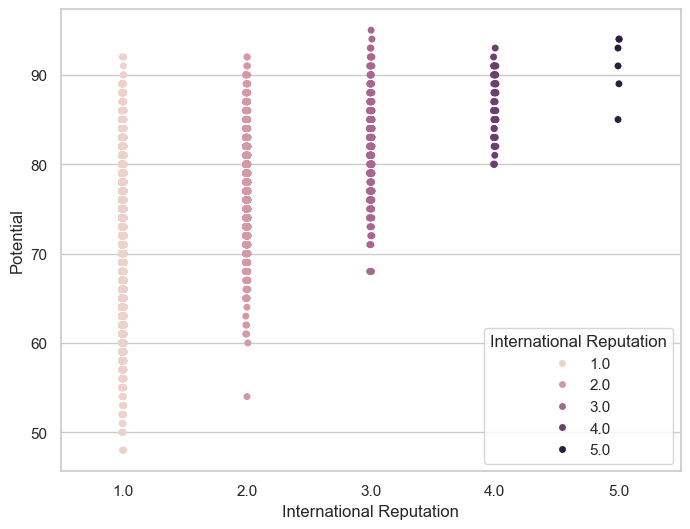

In [24]:
f,ax=plt.subplots(figsize=(8,6))
sns.stripplot(x="International Reputation",y="Potential",data=fifa19,jitter=0.01,hue="International Reputation")
plt.show()

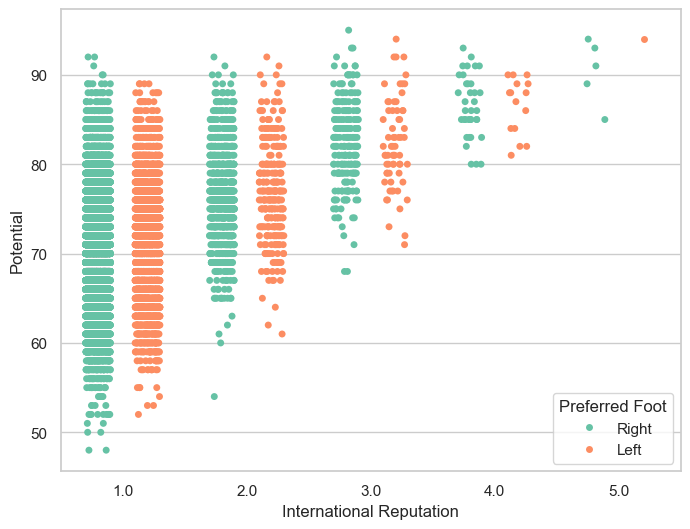

In [25]:
f,ax=plt.subplots(figsize=(8,6))
sns.stripplot(x="International Reputation",y="Potential",hue="Preferred Foot",data=fifa19,jitter=0.2,palette="Set2",dodge=True)
plt.show()

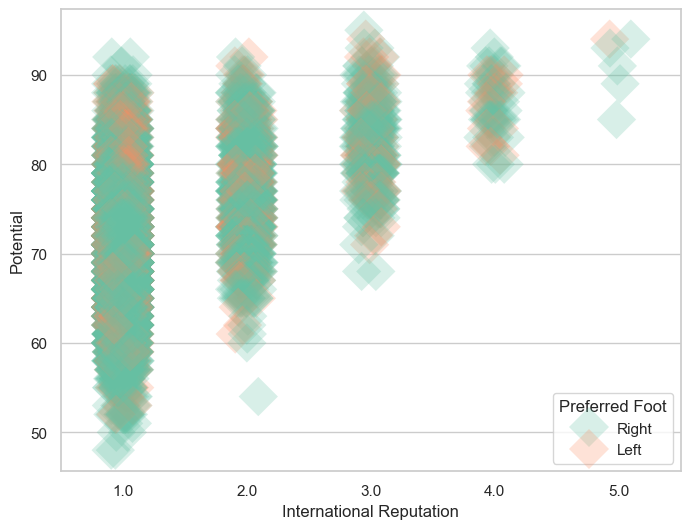

In [26]:
f,ax = plt.subplots(figsize=(8,6))
sns.stripplot(x="International Reputation",y="Potential",hue="Preferred Foot",
                  data=fifa19,palette="Set2",size=20,marker="D",
                  edgecolor="gray",alpha=.25)
plt.show()

# Seaborn boxplot() function

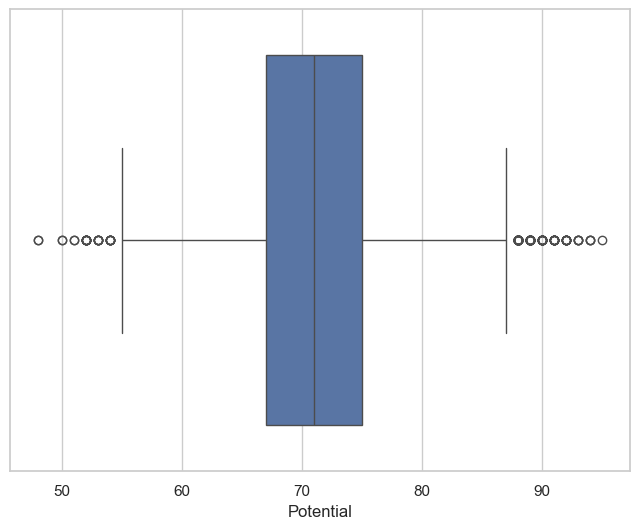

In [27]:
f,ax=plt.subplots(figsize=(8,6))
sns.boxplot(x=fifa19["Potential"])
plt.show()

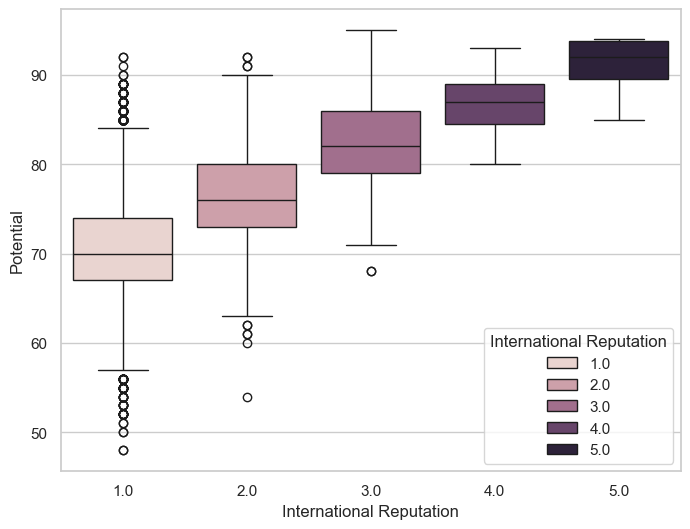

In [28]:
f,ax=plt.subplots(figsize=(8,6))
sns.boxplot(x="International Reputation",y="Potential",data=fifa19,hue="International Reputation")
plt.show()

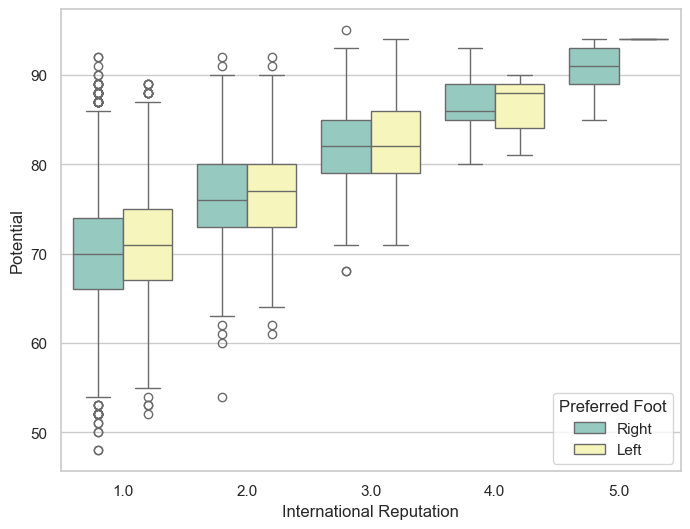

In [29]:
f,ax=plt.subplots(figsize=(8,6))
sns.boxplot(x="International Reputation",y="Potential",hue="Preferred Foot",data=fifa19,palette="Set3")
plt.show()

# Seaborn violinplot() function

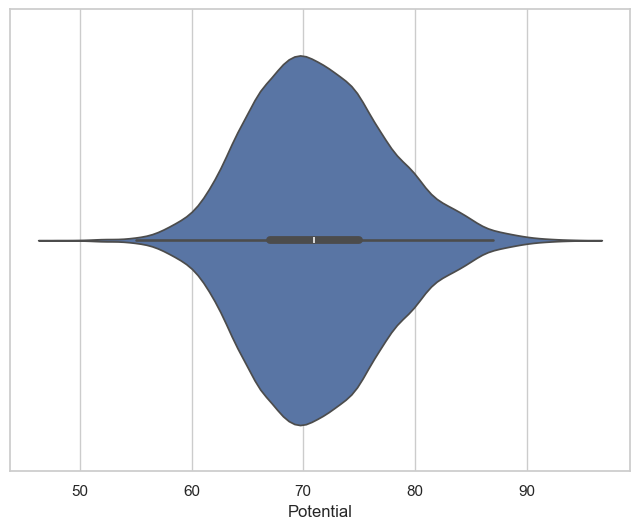

In [30]:
f,ax=plt.subplots(figsize=(8,6))
sns.violinplot(x=fifa19["Potential"])
plt.show()
               

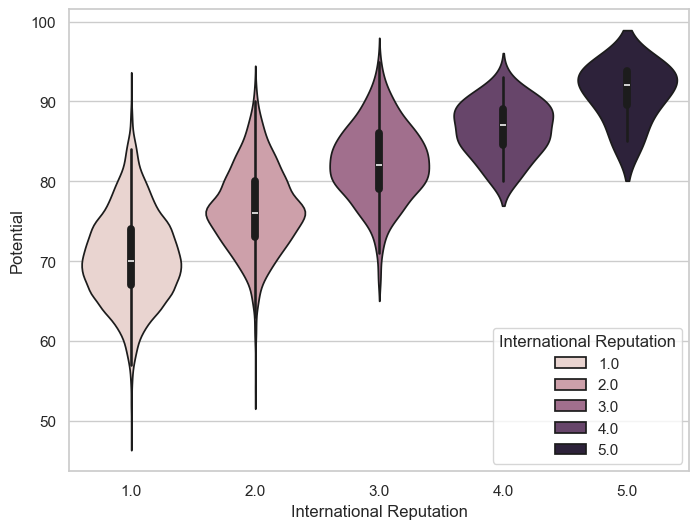

In [31]:
f,ax=plt.subplots(figsize=(8,6))
sns.violinplot(x="International Reputation",y="Potential",data=fifa19,hue="International Reputation")
plt.show()

# Seaborn pointplot() function

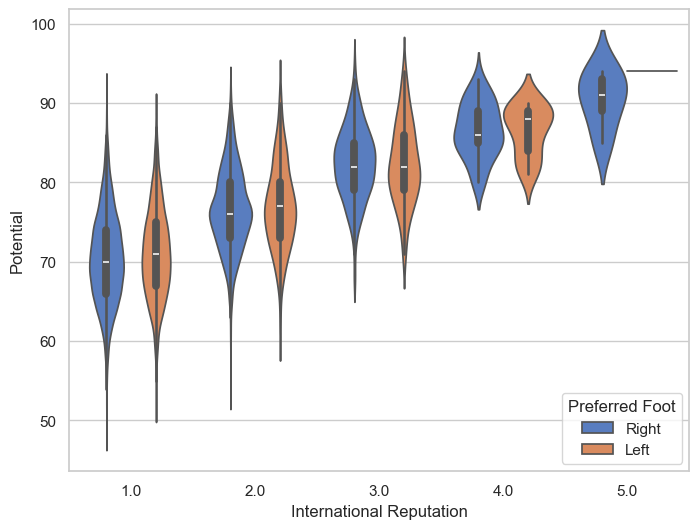

In [32]:
f,ax=plt.subplots(figsize=(8,6))
sns.violinplot(x="International Reputation",y="Potential",hue="Preferred Foot",data=fifa19,palette="muted")
plt.show()

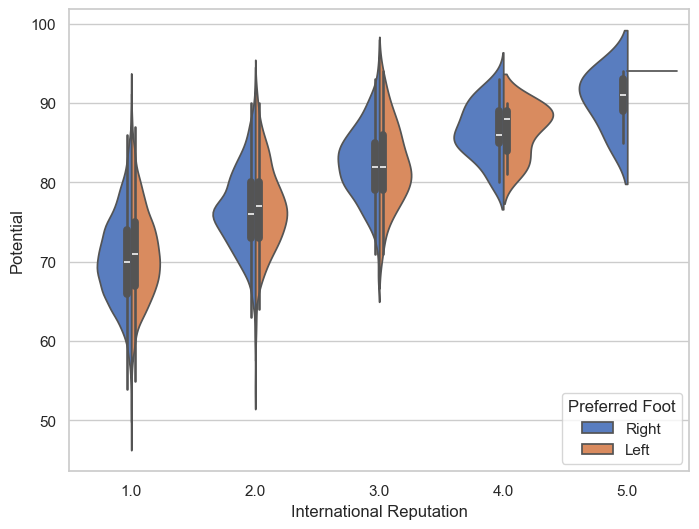

In [33]:
f,ax=plt.subplots(figsize=(8,6))
sns.violinplot(x="International Reputation",y="Potential",hue="Preferred Foot",data=fifa19,palette="muted",split=True)
plt.show()

# Seaborn pointplot() function

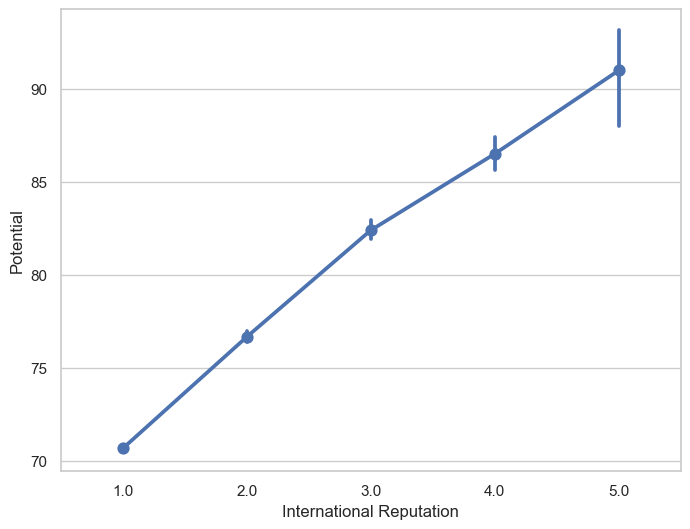

In [34]:
f,ax=plt.subplots(figsize=(8,6))
sns.pointplot(x="International Reputation",y="Potential",data=fifa19)
plt.show()

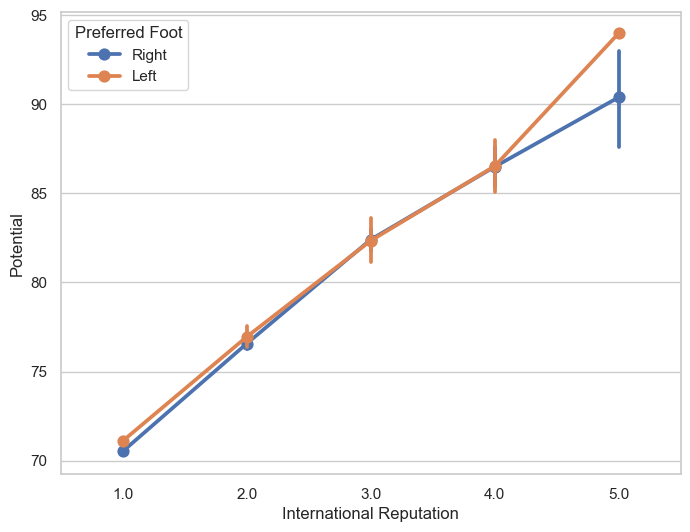

In [35]:
f,ax=plt.subplots(figsize=(8,6))
sns.pointplot(x="International Reputation",y="Potential",hue="Preferred Foot",data=fifa19)
plt.show()

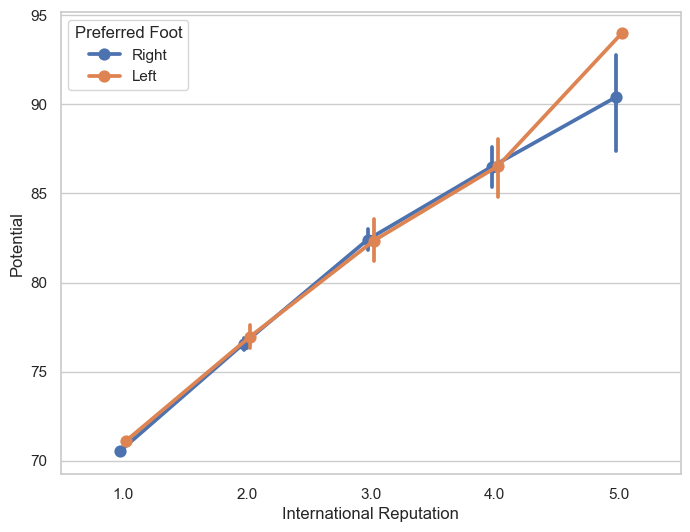

In [36]:
f,ax=plt.subplots(figsize=(8,6))
sns.pointplot(x="International Reputation",y="Potential",hue="Preferred Foot",data=fifa19,dodge=True)
plt.show()

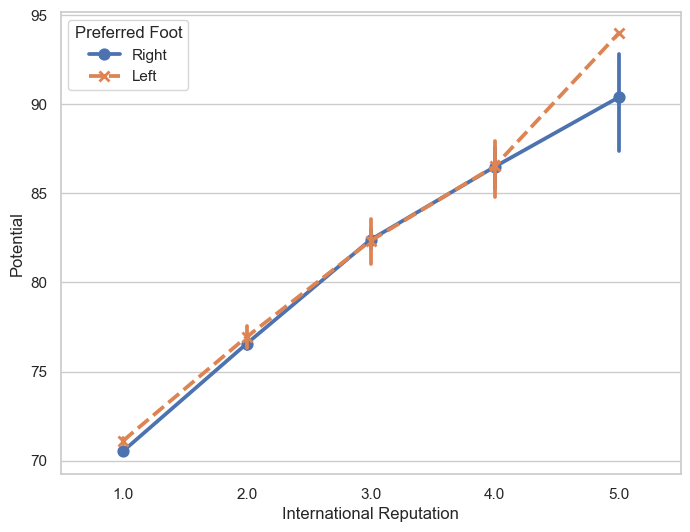

In [37]:
f,ax=plt.subplots(figsize=(8,6))
sns.pointplot(x="International Reputation",y="Potential",hue="Preferred Foot",
              data=fifa19,markers=["o","x"],linestyles=["-","--"])
plt.show()

# Seaborn barplot() function

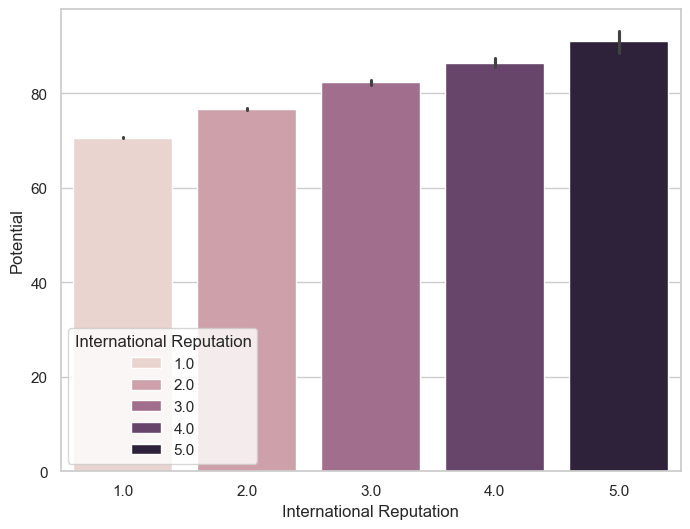

In [38]:
f,ax=plt.subplots(figsize=(8,6))
sns.barplot(x="International Reputation",y="Potential",data=fifa19,hue="International Reputation")
plt.show()

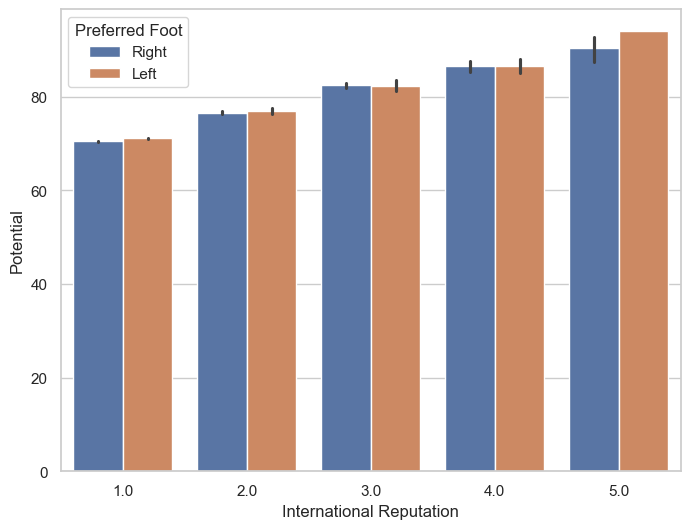

In [39]:
f,ax=plt.subplots(figsize=(8,6))
sns.barplot(x="International Reputation",y="Potential",hue="Preferred Foot",data=fifa19)
plt.show()

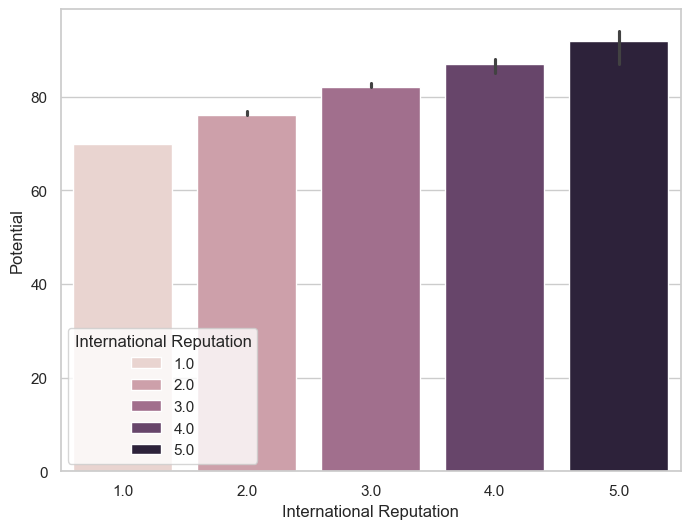

In [40]:
from numpy import median
f,ax=plt.subplots(figsize=(8,6))
sns.barplot(x="International Reputation",y="Potential",data=fifa19,estimator=median,hue="International Reputation")
plt.show()

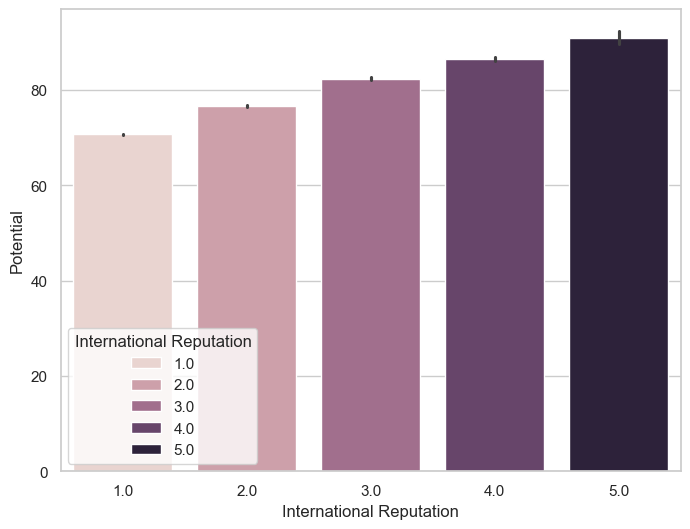

In [41]:
f,ax=plt.subplots(figsize=(8,6))
sns.barplot(x="International Reputation",y="Potential",data=fifa19,ci=68,hue="International Reputation")
plt.show()

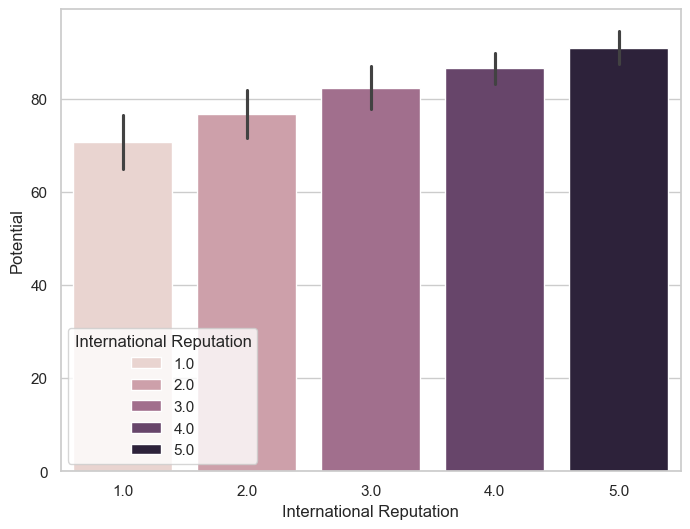

In [42]:
f,ax=plt.subplots(figsize=(8,6))
sns.barplot(x="International Reputation",y="Potential",data=fifa19,ci="sd",hue="International Reputation")
plt.show()

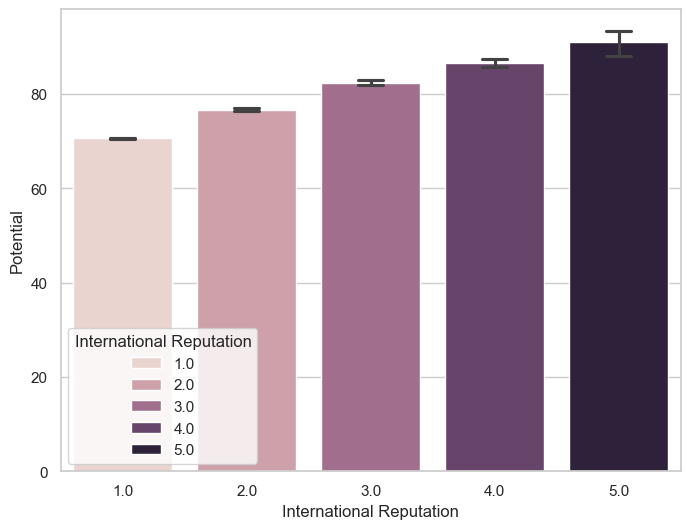

In [43]:
f,ax = plt.subplots(figsize=(8,6))
sns.barplot(x="International Reputation",y="Potential",data=fifa19,capsize=0.2,hue="International Reputation")
plt.show()

# Visualizing statistical relationship with Seaborn relplot() function
# Seaborn relplot() function

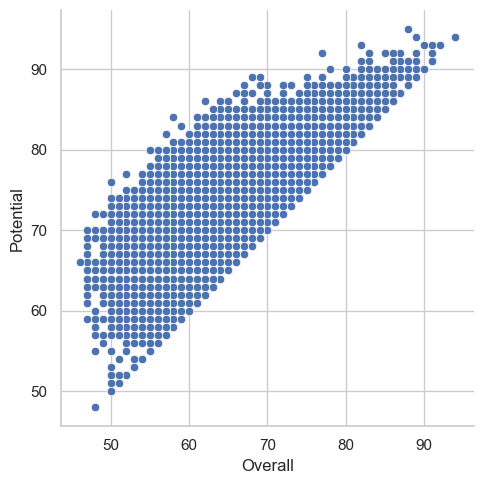

In [44]:
g=sns.relplot(x="Overall",y="Potential",data=fifa19)
plt.show()

# Seaborn scatterplot() function

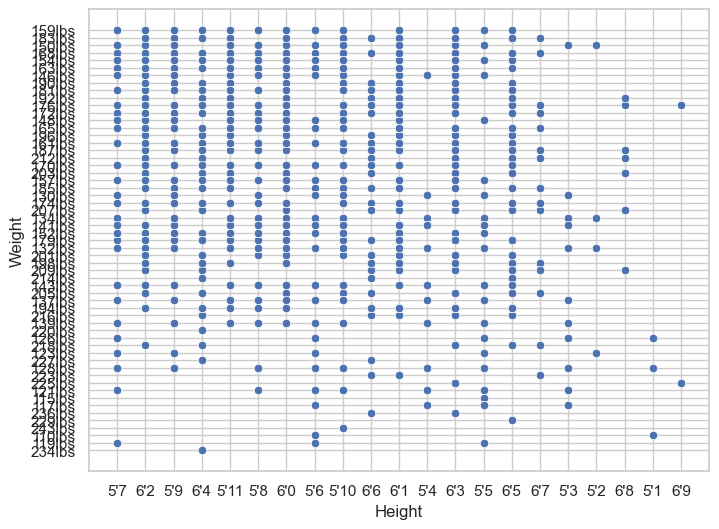

In [45]:
f,ax = plt.subplots(figsize=(8,6))
sns.scatterplot(x="Height",y="Weight",data=fifa19)
plt.show()

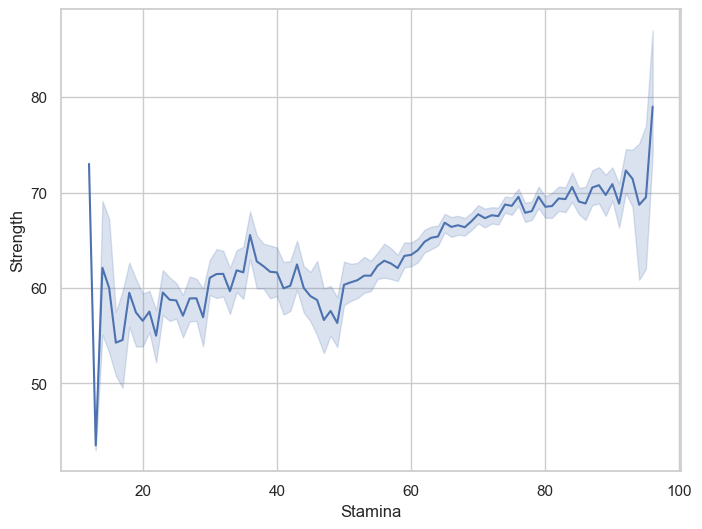

In [46]:
f,ax=plt.subplots(figsize=(8,6))
ax=sns.lineplot(x="Stamina",y="Strength",data=fifa19)
plt.show()

# Visualize linear relationship with seaborn regplot() function

# Seaborn regplot() function

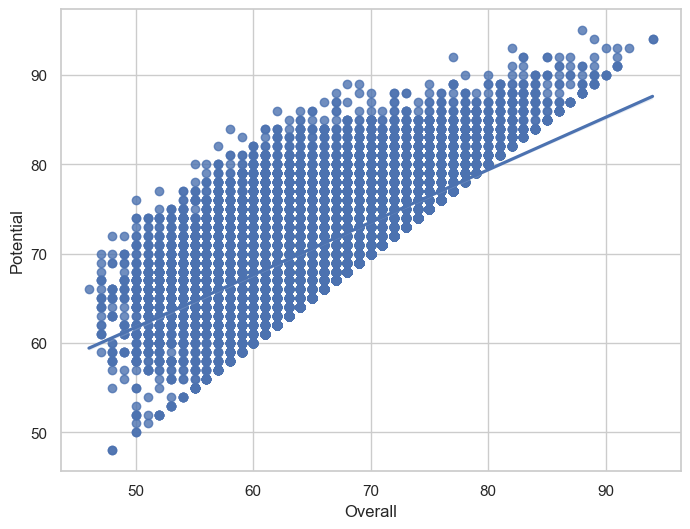

In [47]:
f,ax = plt.subplots(figsize=(8,6))
ax=sns.regplot(x="Overall",y="Potential",data=fifa19)
plt.show()

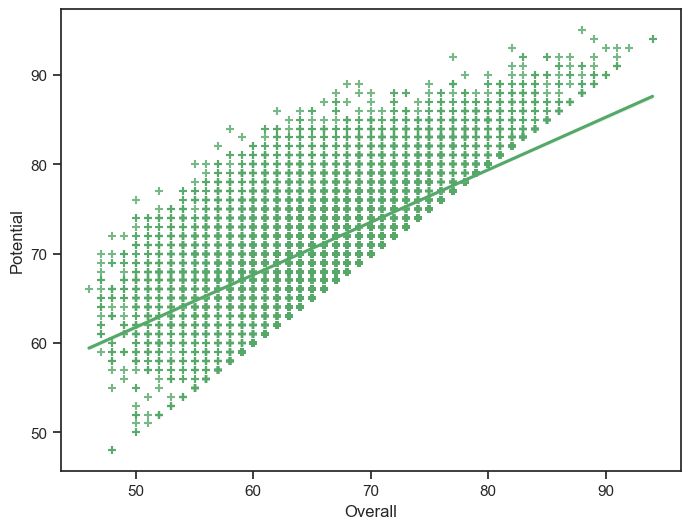

In [110]:
f,ax = plt.subplots(figsize=(8,6))
ax = sns.regplot(x="Overall",y="Potential",data=fifa19,color="g",marker="+")
plt.show()

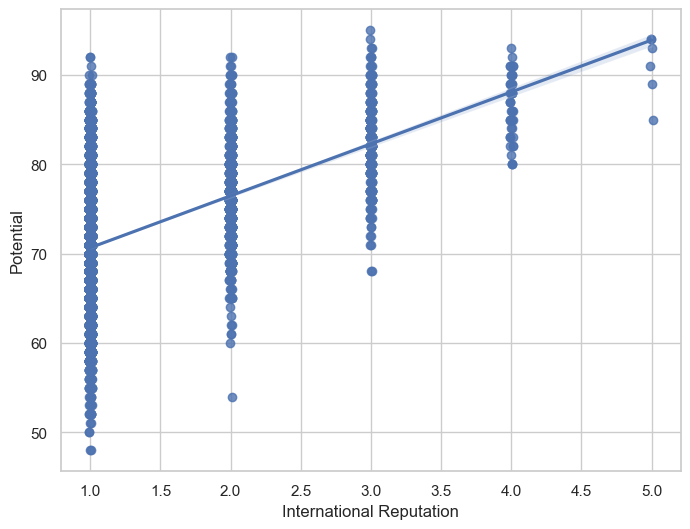

In [50]:
f,ax = plt.subplots(figsize=(8,6))
sns.regplot(x="International Reputation",y="Potential",data=fifa19,x_jitter=.01)
plt.show()

# Seaborn lmplot() function

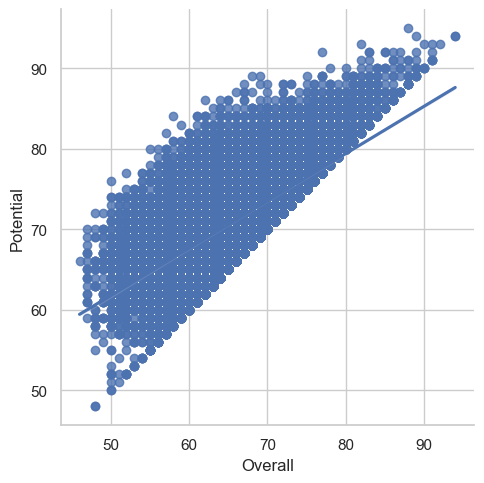

In [53]:
g = sns.lmplot(x="Overall",y="Potential",data=fifa19)
plt.show()

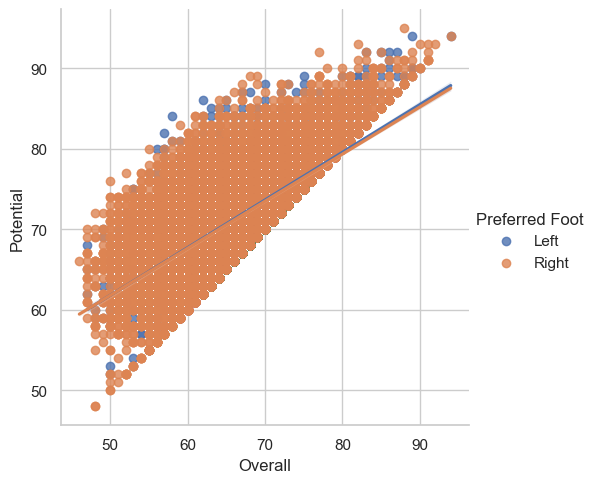

In [56]:
g =sns.lmplot(x="Overall",y="Potential",hue="Preferred Foot",data=fifa19)
plt.show()

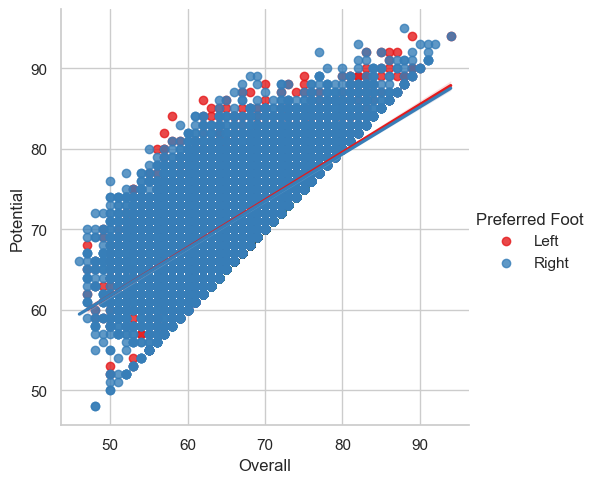

In [57]:
g = sns.lmplot(x="Overall",y="Potential",hue="Preferred Foot",data=fifa19,palette="Set1")
plt.show()

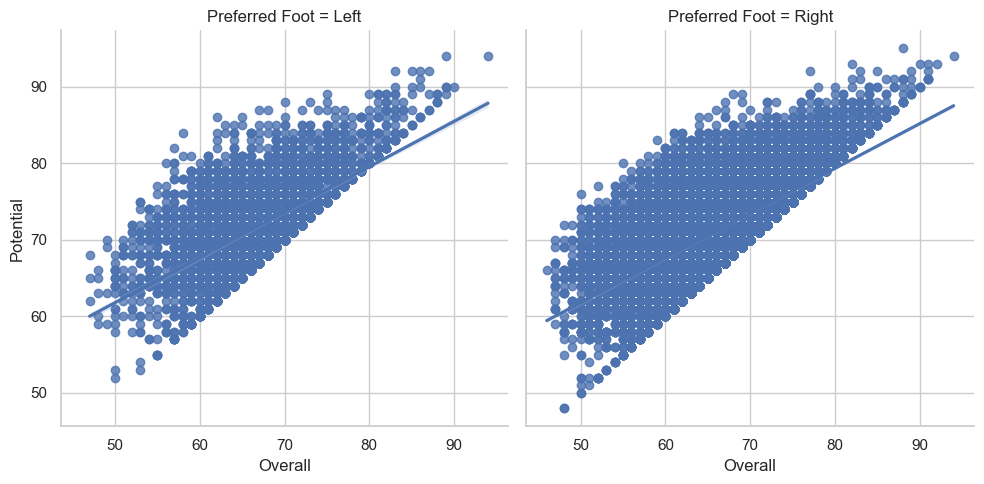

In [58]:
g=sns.lmplot(x="Overall",y="Potential",col="Preferred Foot",data=fifa19)
plt.show()

# Multi-plot grids

# Seaborn FacetGrid() function

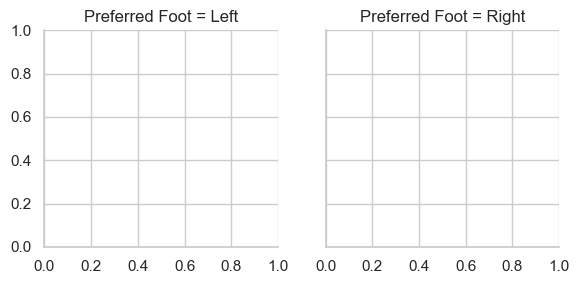

In [63]:
g = sns.FacetGrid(fifa19,col="Preferred Foot")
plt.show()

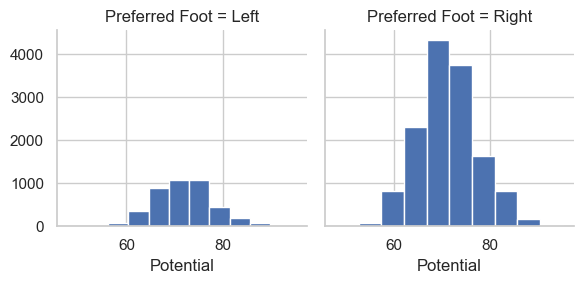

In [66]:
g = sns.FacetGrid(fifa19,col="Preferred Foot")
g = g.map(plt.hist,"Potential")
plt.show()

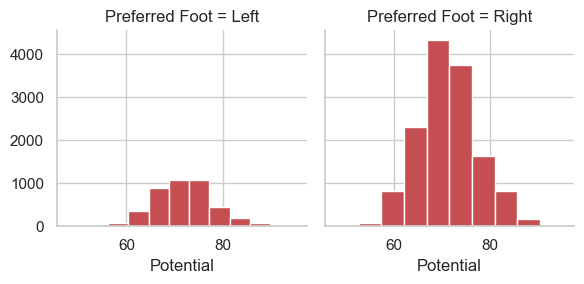

In [68]:
g = sns.FacetGrid(fifa19,col="Preferred Foot")
g = g.map(plt.hist,"Potential",bins=10,color="r")
plt.show()

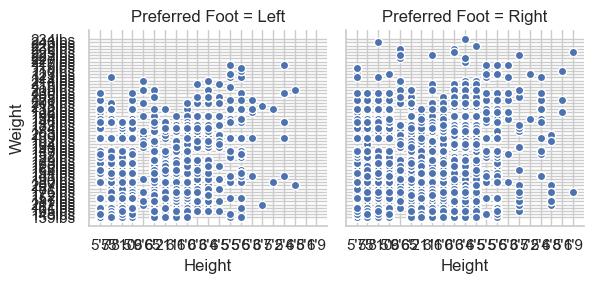

In [71]:
g = sns.FacetGrid(fifa19,col="Preferred Foot")
g = (g.map(plt.scatter,"Height","Weight",edgecolor="w").add_legend())
plt.show()

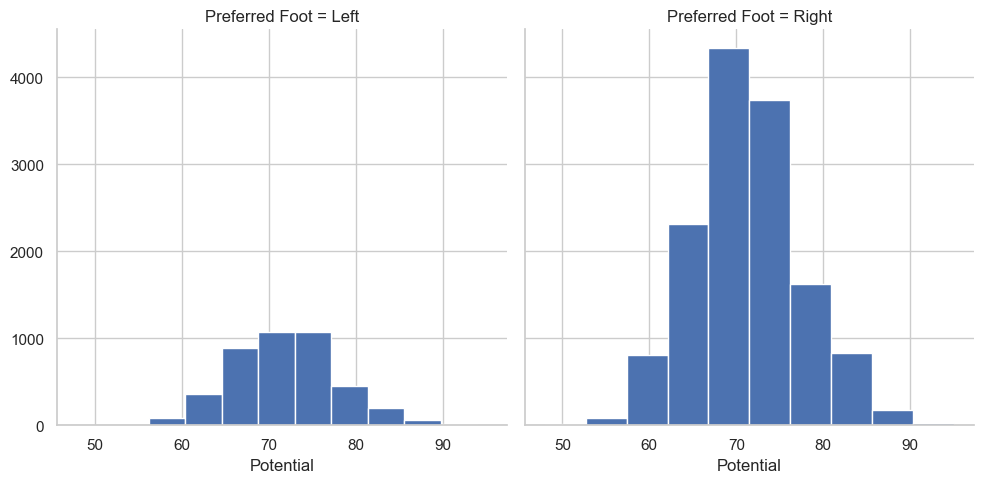

In [72]:
g = sns.FacetGrid(fifa19,col="Preferred Foot",height=5,aspect=1)
g = g.map(plt.hist,"Potential")
plt.show()

# Seaborn PairGrid() function

In [ ]:
fifa19_new = fifa19[['Age','Potential','Strength','Stamina','Preferred Foot']]

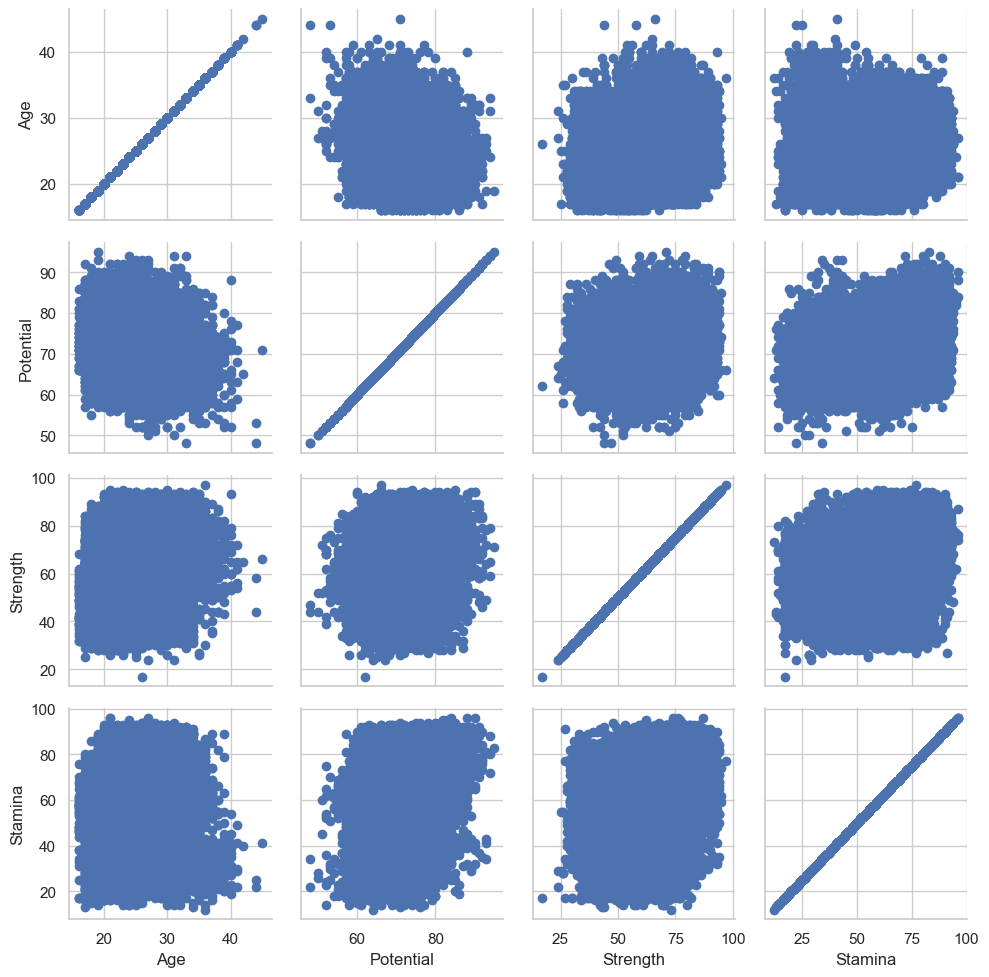

In [75]:
g = sns.PairGrid(fifa19_new)
g = g.map(plt.scatter)
plt.show()

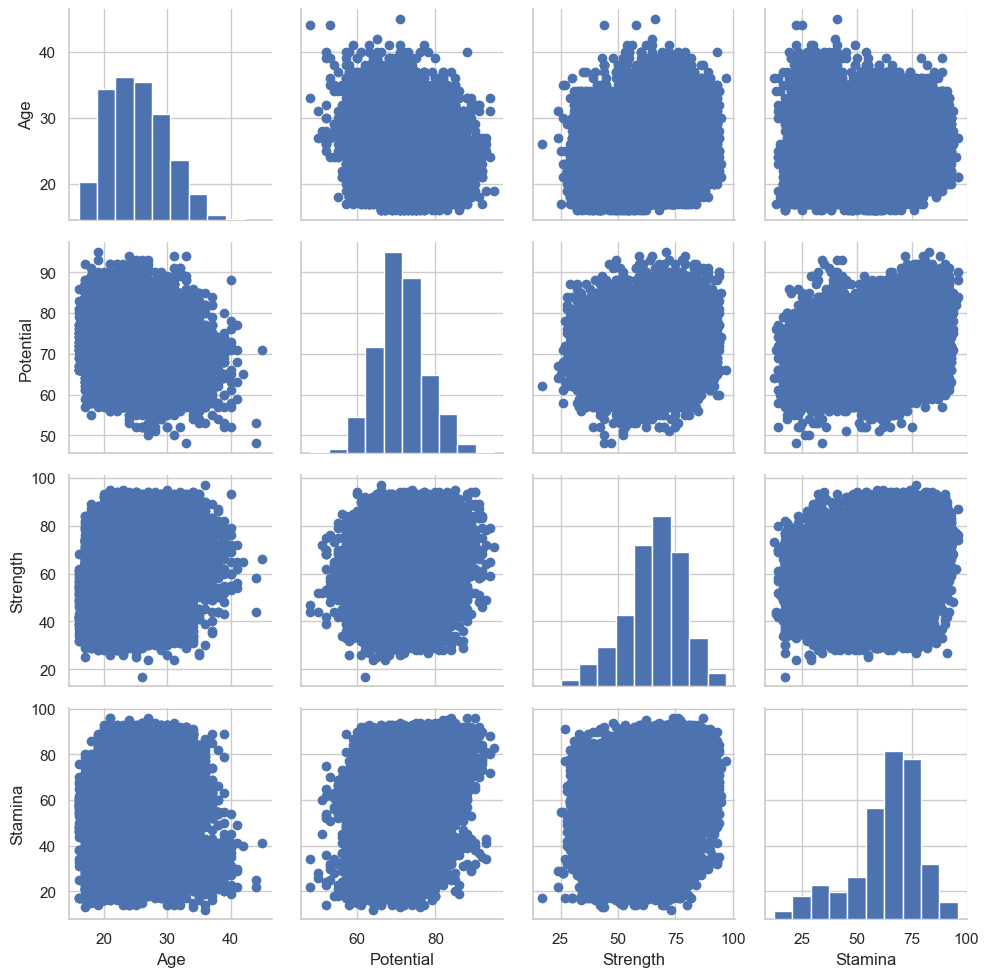

In [78]:
g = sns.PairGrid(fifa19_new)
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
plt.show()

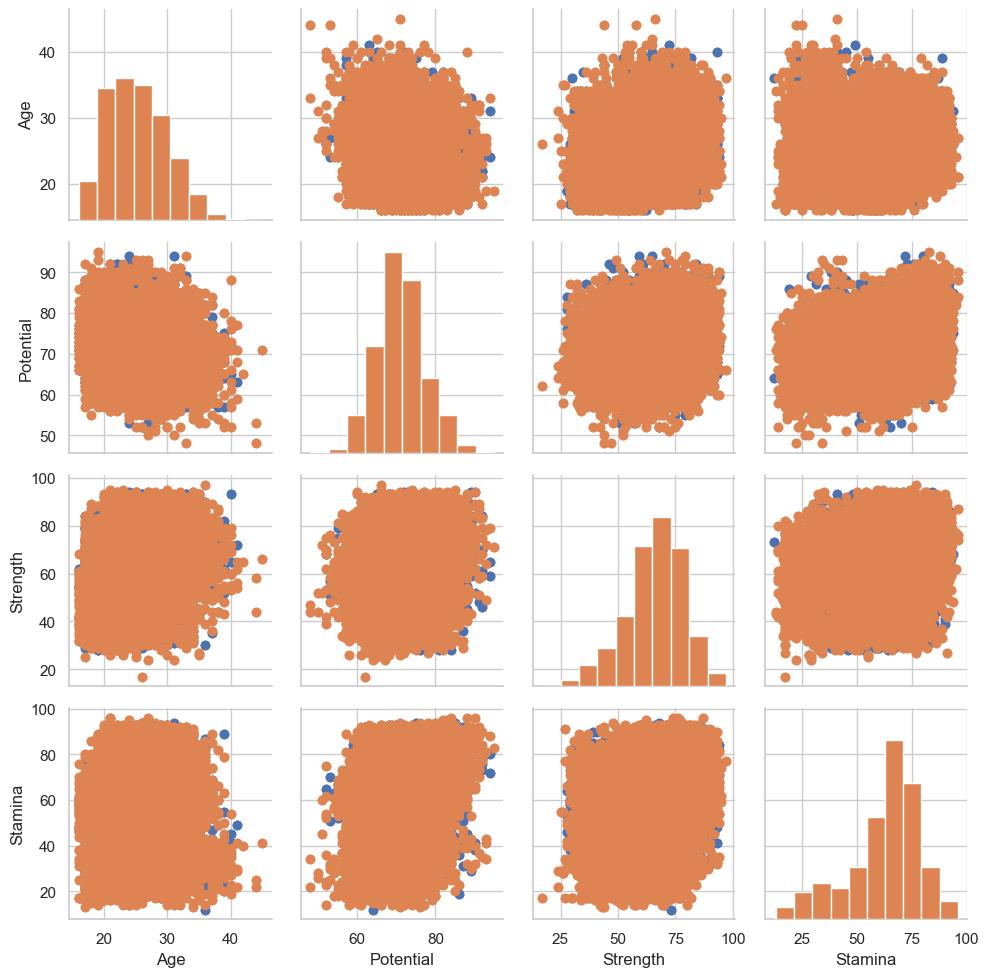

In [80]:
g = sns.PairGrid(fifa19_new,hue="Preferred Foot")
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
g = g.map_offdiag(plt.scatter)
plt.show()

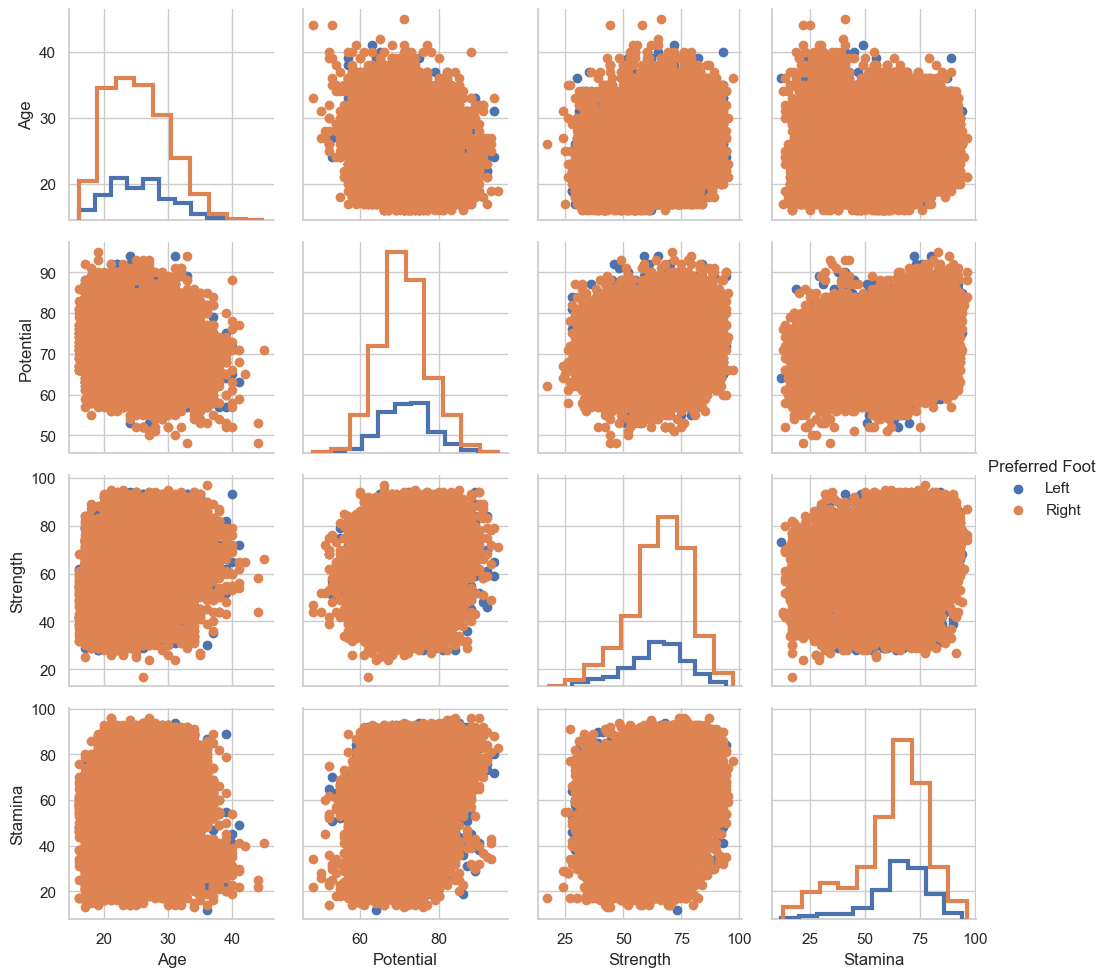

In [81]:
g = sns.PairGrid(fifa19_new,hue="Preferred Foot")
g = g.map_diag(plt.hist,histtype="step",linewidth=3)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()
plt.show()

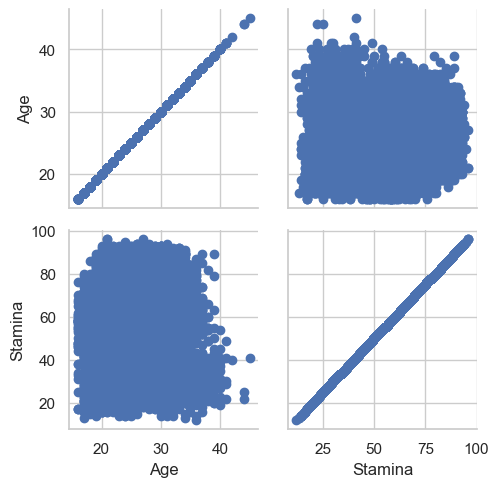

In [82]:
g = sns.PairGrid(fifa19_new,vars=['Age','Stamina'])
g = g.map(plt.scatter)
plt.show()

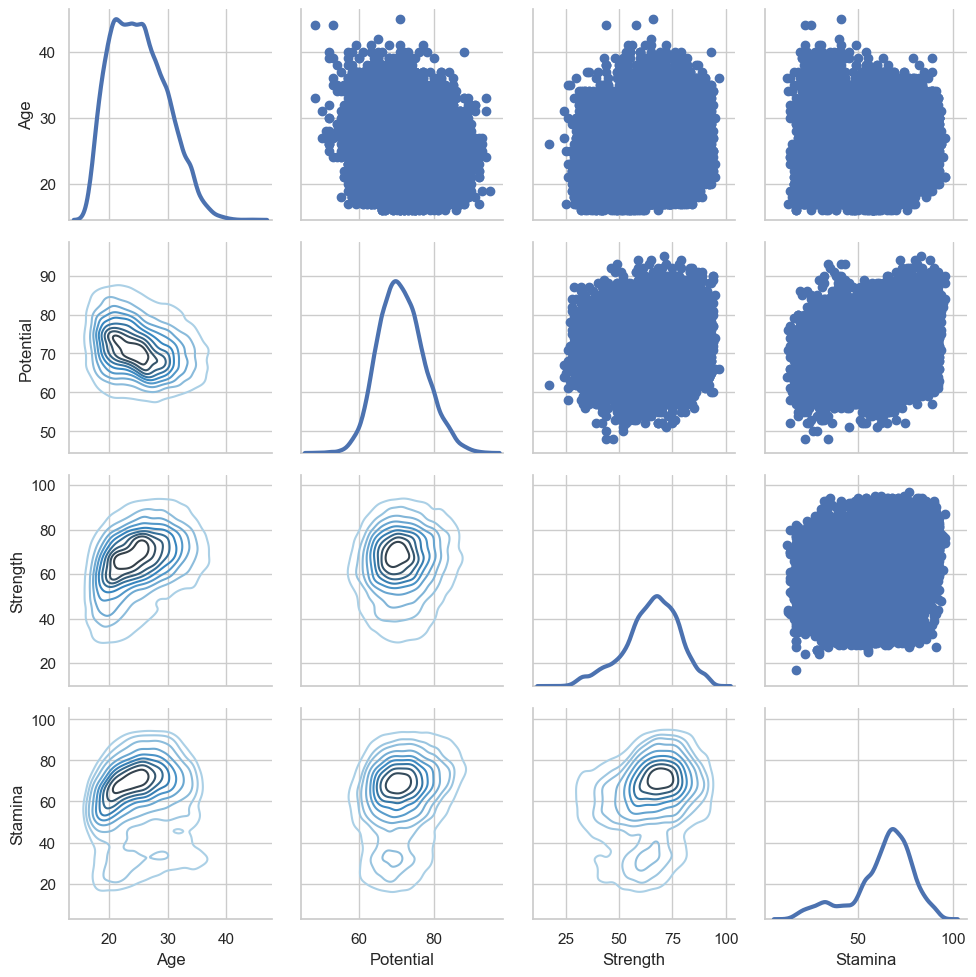

In [83]:
g = sns.PairGrid(fifa19_new)
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot,cmap="Blues_d")
g = g.map_diag(sns.kdeplot,lw=3,legend=False)
plt.show()

# Seaborn JointGrid() function

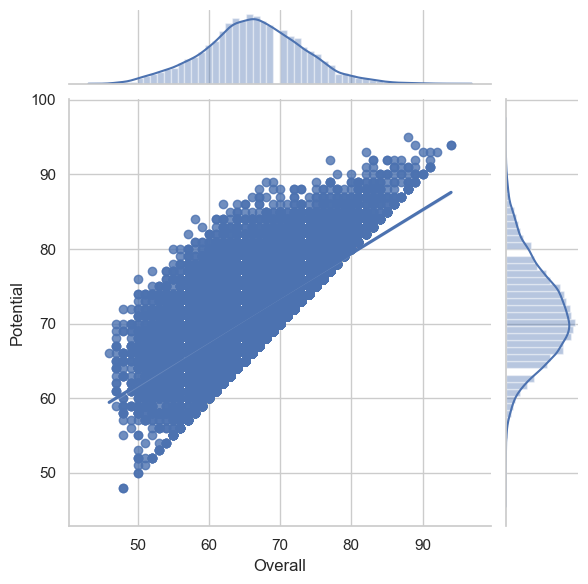

In [84]:
g = sns.JointGrid(x="Overall",y="Potential",data=fifa19)
g = g.plot(sns.regplot,sns.distplot)
plt.show()

In [85]:
import matplotlib.pyplot as plt

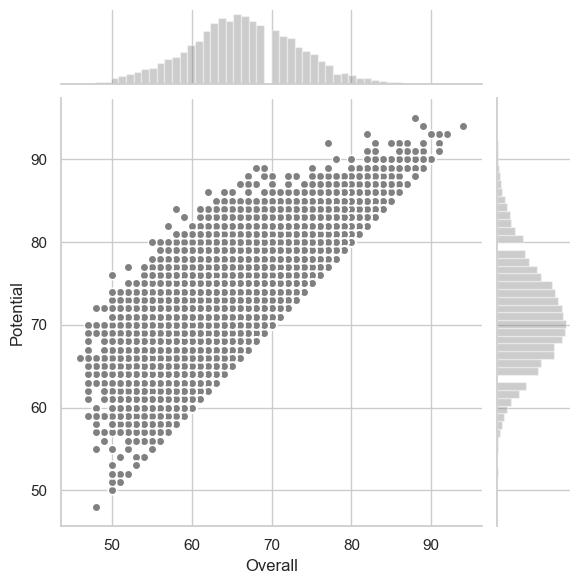

In [89]:
g = sns.JointGrid(x="Overall",y="Potential",data=fifa19)
g = g.plot_joint(plt.scatter,color=".5",edgecolor="White")
g = g.plot_marginals(sns.distplot,kde=False,color=".5")
plt.show()

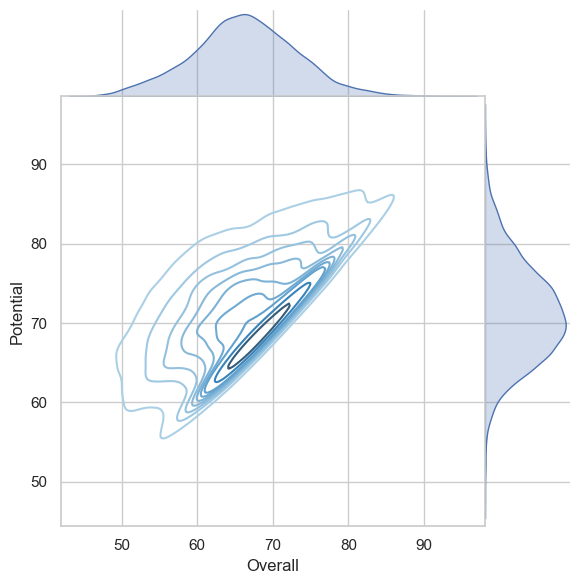

In [90]:
g = sns.JointGrid(x="Overall",y="Potential",data=fifa19,space=0)
g = g.plot_joint(sns.kdeplot,cmap="Blues_d")
g = g.plot_marginals(sns.kdeplot,shade=True)
plt.show()

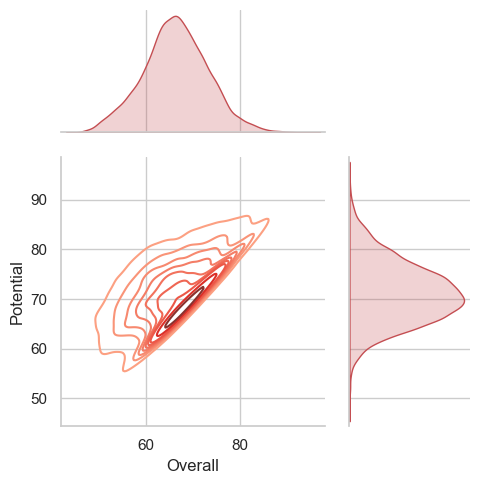

In [91]:
g = sns.JointGrid(x="Overall",y="Potential",data=fifa19,height=5,ratio=2)
g = g.plot_joint(sns.kdeplot,cmap="Reds_d")
g = g.plot_marginals(sns.kdeplot,color="r",shade=True)
plt.show()

# Controlling the size and shape of the plot

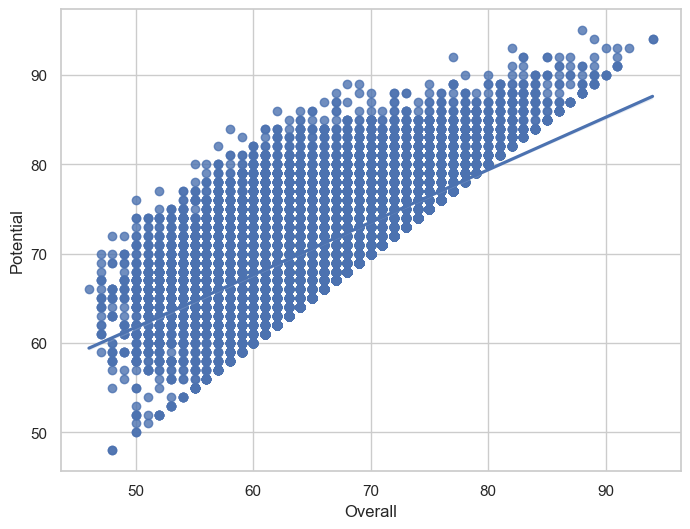

In [92]:
f,ax = plt.subplots(figsize=(8,6))
ax = sns.regplot(x="Overall",y="Potential",data=fifa19);
plt.show()

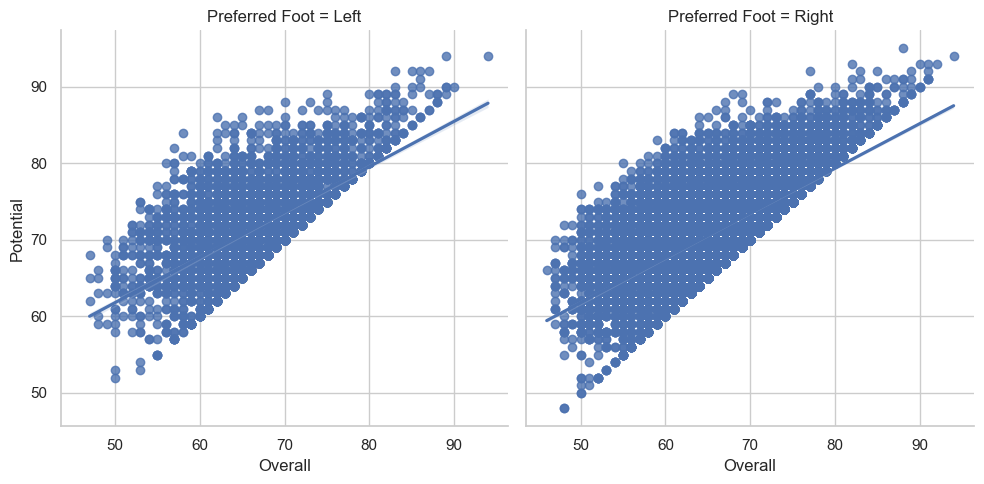

In [94]:
sns.lmplot(x="Overall",y="Potential",col="Preferred Foot",data=fifa19,col_wrap=2,height=5,aspect=1)
plt.show()

# Seaborn figure styles

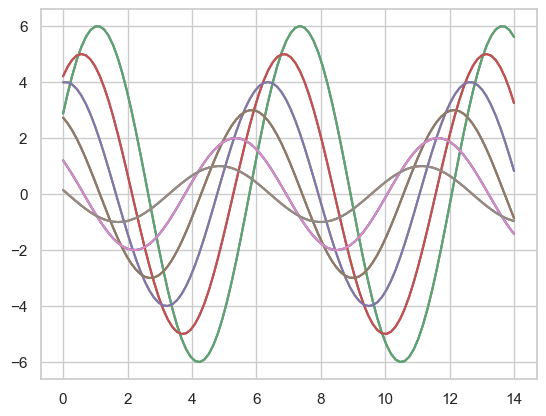

In [100]:
def sinplot(flip=1):
    x = np.linspace(0,14,100)
    for i in range(1,7):
        plt.plot(x,np.sin(x + i * .5)*(7 - i)*flip)

sinplot()
plt.show()

In [101]:
sns.set()
sinplot()

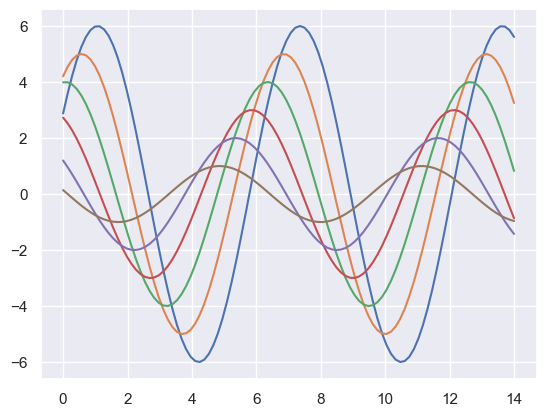

In [102]:
plt.show()

In [104]:
sns.set_style("whitegrid")
sinplot()

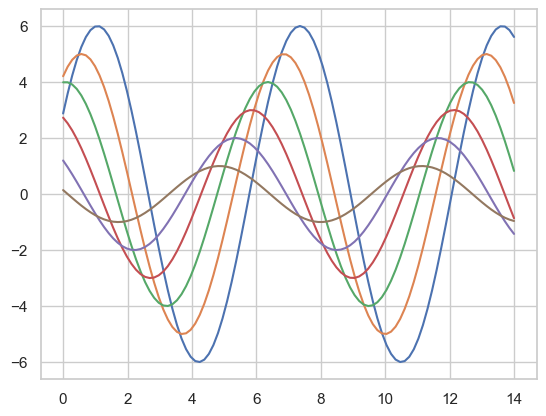

In [105]:
plt.show()

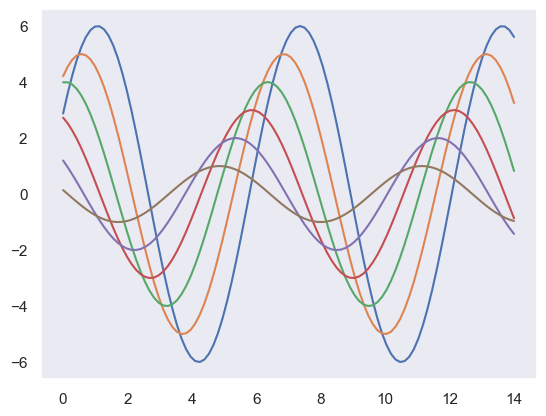

In [106]:
sns.set_style("dark")
sinplot()
plt.show()

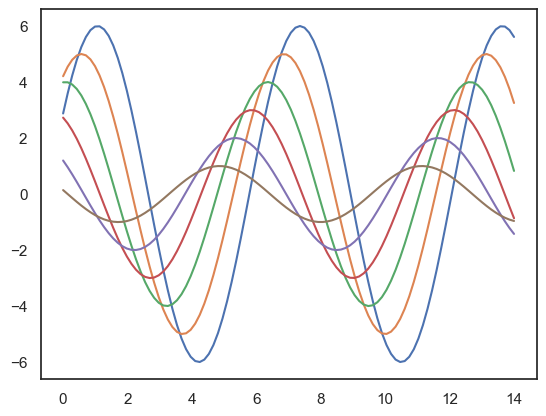

In [107]:
sns.set_style("white")
sinplot()
plt.show()

In [108]:
sns.set_style("ticks")
sinplot()

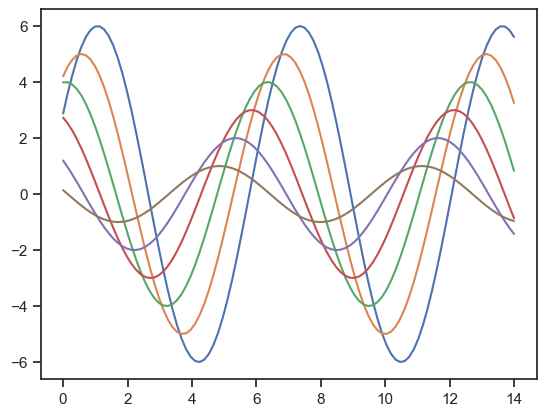

In [109]:
plt.show()

# FIFA and Seaborn Completed